# Comparando a Classificação dos Modelos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
#style.use("fivethirtyeight")

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, svm
import joblib

from pretty_confusion_matrix import pp_matrix

import warnings
warnings.filterwarnings('ignore')

## Dados Reais - Classificados via Automação (Ontology)

In [2]:
# Datasets

dados_output = pd.read_csv("datasets/outputSummaryOutputDataNOVOS.csv")
dados_output.head()

,Dataset,SubDominio(Esperado),SensorCategories,IoTSubdomain,Inference Type,Anonymization Algorithm
0,1,SecurityPublic,40,SecurityPublic,Percentage,k-anonimato
1,2,SecurityPublic,18,SecurityPublic,Percentage,k-anonimato
2,3,SecurityPublic,43,SecurityPublic,Percentage,k-anonimato
3,4,SecurityPublic,15,SecurityPublic,Percentage,k-anonimato
4,5,SecurityPublic,33,SecurityPublic,Percentage,k-anonimato


In [3]:
dados_output.IoTSubdomain.unique()

array(['SecurityPublic', 'UrbanMobility', 'SmartGrid', 'SmartHome',
       'Undefined', 'Agriculture', 'Logistic', 'IndustrialProcesses',
       'HealthCare', 'IndependentLiving'], dtype=object)

In [4]:
dados_output["SubDominio(Esperado)"].unique()

array(['SecurityPublic', 'UrbanMobility', 'SmartGrid', 'SmartHome',
       'SmartCampus', 'Undefined', 'Agriculture', 'Logistic',
       'IndustrialProcesses', 'HealthCare', 'IndependentLiving'],
      dtype=object)

In [5]:
dados_confmatrix = pd.crosstab(dados_output["SubDominio(Esperado)"], dados_output["IoTSubdomain"], margins=False)

dados_confmatrix["SmartCampus"] = 0.0
#dados_confmatrix["IndependentLiving"] = 0
#real_mc = real_mc.rename_axis(None)
#real_mc = real_mc.rename_axis(None, axis=1)
dados_confmatrix = dados_confmatrix[['Agriculture',	'HealthCare', 'IndependentLiving', 'IndustrialProcesses', 'Logistic', 'SecurityPublic', 'SmartCampus', 'SmartGrid', 'SmartHome',
'Undefined', 'UrbanMobility']]

dados_confmatrix

IoTSubdomain,Agriculture,HealthCare,IndependentLiving,IndustrialProcesses,Logistic,SecurityPublic,SmartCampus,SmartGrid,SmartHome,Undefined,UrbanMobility
SubDominio(Esperado),,,,,,,,,,,
Agriculture,6,0,0,0,0,0,0.0,0,0,0,0
HealthCare,0,6,0,0,0,0,0.0,0,0,0,0
IndependentLiving,0,5,1,0,0,0,0.0,0,0,0,0
IndustrialProcesses,0,0,0,6,0,0,0.0,0,0,0,0
Logistic,0,0,0,0,6,0,0.0,0,0,0,0
SecurityPublic,0,0,0,0,0,6,0.0,0,0,0,0
SmartCampus,0,0,0,0,0,4,0.0,2,0,0,0
SmartGrid,0,0,0,0,0,0,0.0,6,0,0,0
SmartHome,0,0,0,0,0,2,0.0,0,4,0,0


In [6]:
dados_confmatrix = pd.crosstab(dados_output["SubDominio(Esperado)"], dados_output["IoTSubdomain"], margins=False, normalize="index").round(4)*100
dados_confmatrix["SmartCampus"] = 0.0
#dados_confmatrix["IndependentLiving"] = 0
dados_confmatrix = dados_confmatrix[['Agriculture',	'HealthCare', 'IndependentLiving', 'IndustrialProcesses', 'Logistic', 'SecurityPublic', 'SmartCampus', 'SmartGrid', 'SmartHome',
'Undefined', 'UrbanMobility']]
dados_confmatrix

IoTSubdomain,Agriculture,HealthCare,IndependentLiving,IndustrialProcesses,Logistic,SecurityPublic,SmartCampus,SmartGrid,SmartHome,Undefined,UrbanMobility
SubDominio(Esperado),,,,,,,,,,,
Agriculture,100.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00
HealthCare,0.0,100.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00
IndependentLiving,0.0,83.33,16.67,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00
IndustrialProcesses,0.0,0.00,0.00,100.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00
Logistic,0.0,0.00,0.00,0.0,100.0,0.00,0.0,0.00,0.00,0.0,0.00
SecurityPublic,0.0,0.00,0.00,0.0,0.0,100.00,0.0,0.00,0.00,0.0,0.00
SmartCampus,0.0,0.00,0.00,0.0,0.0,66.67,0.0,33.33,0.00,0.0,0.00
SmartGrid,0.0,0.00,0.00,0.0,0.0,0.00,0.0,100.00,0.00,0.0,0.00
SmartHome,0.0,0.00,0.00,0.0,0.0,33.33,0.0,0.00,66.67,0.0,0.00


In [7]:
print(metrics.classification_report(dados_output["SubDominio(Esperado)"], dados_output["IoTSubdomain"]))

                     precision    recall  f1-score   support

        Agriculture       1.00      1.00      1.00         6
         HealthCare       0.55      1.00      0.71         6
  IndependentLiving       1.00      0.17      0.29         6
IndustrialProcesses       1.00      1.00      1.00         6
           Logistic       1.00      1.00      1.00         6
     SecurityPublic       0.43      1.00      0.60         6
        SmartCampus       0.00      0.00      0.00         6
          SmartGrid       0.75      1.00      0.86         6
          SmartHome       1.00      0.67      0.80         6
          Undefined       1.00      1.00      1.00         1
      UrbanMobility       1.00      0.67      0.80         6

           accuracy                           0.75        61
          macro avg       0.79      0.77      0.73        61
       weighted avg       0.78      0.75      0.71        61



In [8]:
table1 = metrics.classification_report(dados_output["SubDominio(Esperado)"], dados_output["IoTSubdomain"])

In [9]:
table1 

'                     precision    recall  f1-score   support\n\n        Agriculture       1.00      1.00      1.00         6\n         HealthCare       0.55      1.00      0.71         6\n  IndependentLiving       1.00      0.17      0.29         6\nIndustrialProcesses       1.00      1.00      1.00         6\n           Logistic       1.00      1.00      1.00         6\n     SecurityPublic       0.43      1.00      0.60         6\n        SmartCampus       0.00      0.00      0.00         6\n          SmartGrid       0.75      1.00      0.86         6\n          SmartHome       1.00      0.67      0.80         6\n          Undefined       1.00      1.00      1.00         1\n      UrbanMobility       1.00      0.67      0.80         6\n\n           accuracy                           0.75        61\n          macro avg       0.79      0.77      0.73        61\n       weighted avg       0.78      0.75      0.71        61\n'

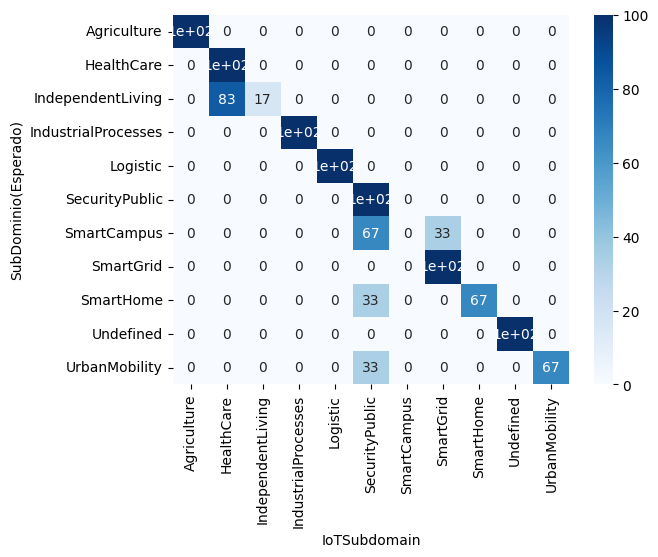

In [10]:
# YlGnBu,Blues,RdBu,
# cmap = "Blues"
sns.heatmap(dados_confmatrix, cmap='Blues', annot=True);

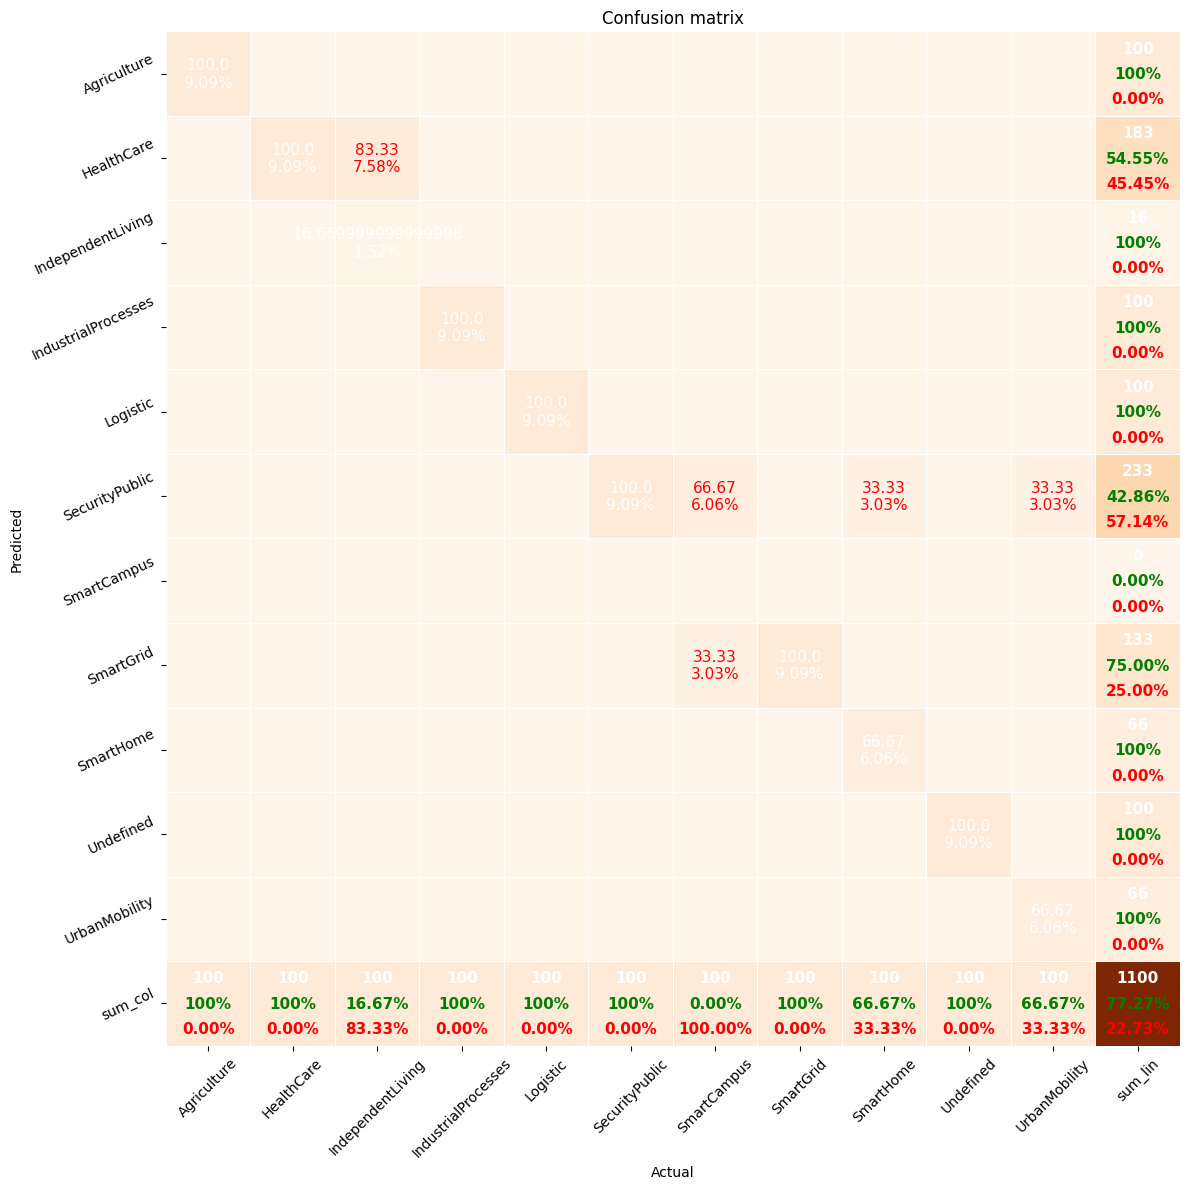

In [11]:
pp_matrix(dados_confmatrix, figsize=[12, 12])

In [12]:
dados_confmatrix1 = pd.crosstab(dados_output["SubDominio(Esperado)"], dados_output["IoTSubdomain"], margins=True)

dados_confmatrix["SmartCampus"] = 0
#dados_confmatrix = dados_confmatrix[['Agriculture',	'HealthCare', 'IndependentLiving', #'IndustrialProcesses', 'Logistic', 'SecurityPublic', 'SmartCampus', 'SmartGrid', 'SmartHome',
#'Undefined', 'UrbanMobility']]

dados_confmatrix

IoTSubdomain,Agriculture,HealthCare,IndependentLiving,IndustrialProcesses,Logistic,SecurityPublic,SmartCampus,SmartGrid,SmartHome,Undefined,UrbanMobility
SubDominio(Esperado),,,,,,,,,,,
Agriculture,100.0,0.00,0.00,0.0,0.0,0.00,0,0.00,0.00,0.0,0.00
HealthCare,0.0,100.00,0.00,0.0,0.0,0.00,0,0.00,0.00,0.0,0.00
IndependentLiving,0.0,83.33,16.67,0.0,0.0,0.00,0,0.00,0.00,0.0,0.00
IndustrialProcesses,0.0,0.00,0.00,100.0,0.0,0.00,0,0.00,0.00,0.0,0.00
Logistic,0.0,0.00,0.00,0.0,100.0,0.00,0,0.00,0.00,0.0,0.00
SecurityPublic,0.0,0.00,0.00,0.0,0.0,100.00,0,0.00,0.00,0.0,0.00
SmartCampus,0.0,0.00,0.00,0.0,0.0,66.67,0,33.33,0.00,0.0,0.00
SmartGrid,0.0,0.00,0.00,0.0,0.0,0.00,0,100.00,0.00,0.0,0.00
SmartHome,0.0,0.00,0.00,0.0,0.0,33.33,0,0.00,66.67,0.0,0.00


In [13]:
dados_confmatrix = dados_confmatrix.rename(columns={"HealthCare": "Health Care", "IndependentLiving":"Independent Living", "IndustrialProcesses": "Industrial Processes",
                                  "SecurityPublic": "Security Public", "SmartCampus": "Smart Campus", "SmartGrid": "Smart Grid",
                                  "SmartHome": "Smart Home", "UrbanMobility": "Urban Mobility"},
                        index={"HealthCare": "Health Care", "IndependentLiving":"Independent Living", "IndustrialProcesses": "Industrial Processes",
                                  "SecurityPublic": "Security Public", "SmartCampus": "Smart Campus", "SmartGrid": "Smart Grid",
                                  "SmartHome": "Smart Home", "UrbanMobility": "Urban Mobility"})

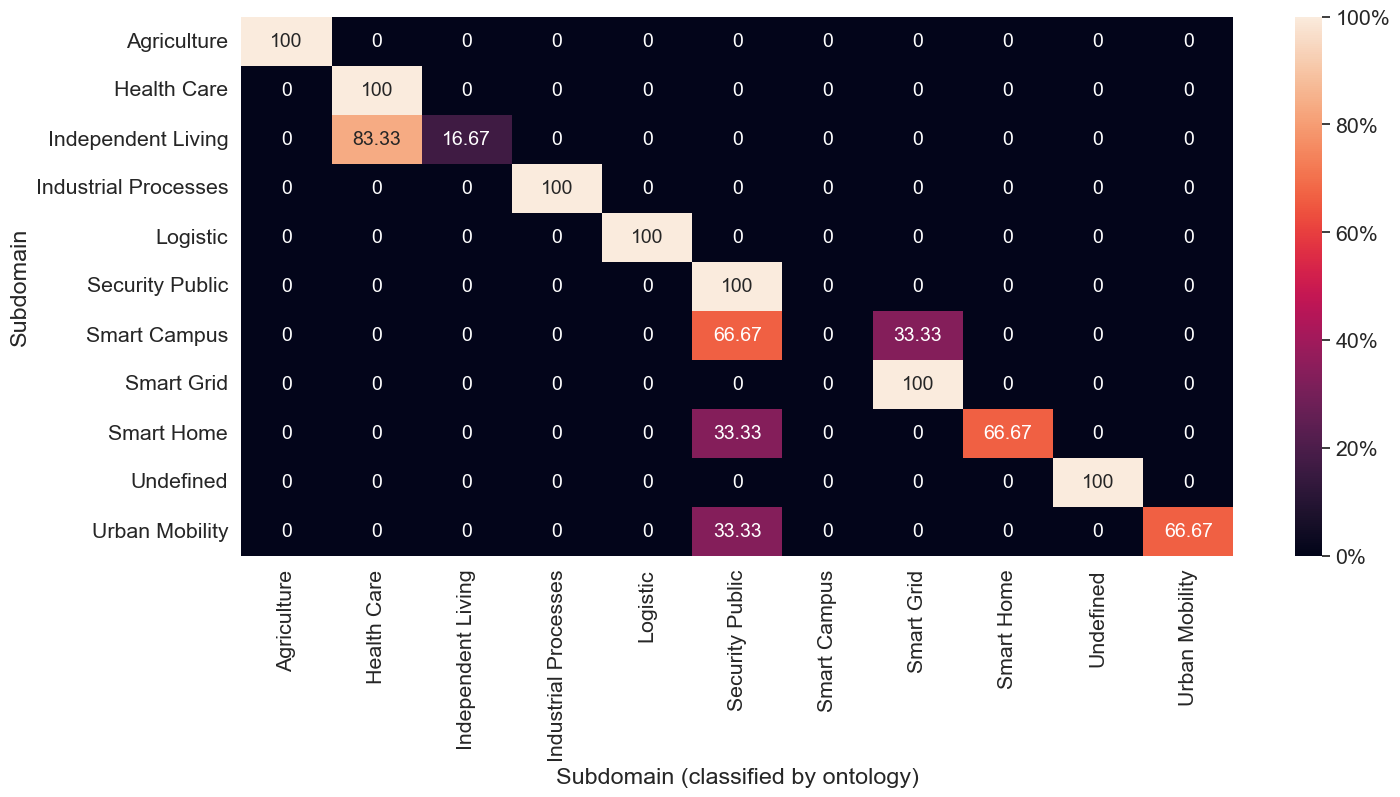

In [14]:
dados_confmatrix = dados_confmatrix.rename(columns={"HealthCare": "Health Care", "IndependentLiving":"Independent Living", "IndustrialProcesses": "Industrial Processes",
                                  "SecurityPublic": "Security Public", "SmartCampus": "Smart Campus", "SmartGrid": "Smart Grid",
                                  "SmartHome": "Smart Home", "UrbanMobility": "Urban Mobility"},
                        index={"HealthCare": "Health Care", "IndependentLiving":"Independent Living", "IndustrialProcesses": "Industrial Processes",
                                  "SecurityPublic": "Security Public", "SmartCampus": "Smart Campus", "SmartGrid": "Smart Grid",
                                  "SmartHome": "Smart Home", "UrbanMobility": "Urban Mobility"})

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(dados_confmatrix, annot=True, fmt='.4g', annot_kws={"size": 14}, cbar_kws={'format': '%.0f%%'}) # font size
ax.set(xlabel="Subdomain (classified by ontology)", ylabel="Subdomain")
plt.show()

## Classificados via KNN Model

In [15]:
dados_output_new = pd.read_csv("datasets/outputDetailedSubdomainsDataOccurrence_Reshape_Percentagens_NOVO.csv")

dados_output_new.head()

,Dataset,subDominio,feature_a,feature_b,feature_c,feature_d,feature_e,feature_f,feature_g,feature_h,feature_i,feature_j
0,1,SecurityPublic,100.0,33.33,0.0,47.62,44.44,37.5,75.0,66.67,53.85,0.0
1,2,SecurityPublic,75.0,16.67,0.0,14.29,11.11,50.0,0.0,33.33,15.38,0.0
2,3,SecurityPublic,100.0,41.67,0.0,47.62,55.56,37.5,75.0,66.67,53.85,0.0
3,4,SecurityPublic,62.5,25.00,0.0,14.29,0.00,25.0,25.0,16.67,23.08,0.0
4,5,SecurityPublic,100.0,33.33,0.0,52.38,11.11,37.5,25.0,33.33,46.15,0.0


In [16]:
X_valid = dados_output_new.drop(["Dataset", "subDominio"], axis=1)
y_valid = dados_output_new["subDominio"] 

In [17]:
knn_model = joblib.load('knn_model.pkl')

In [18]:
knn_predict = knn_model.predict(X_valid)

In [19]:
knn_matrix = pd.crosstab(y_valid, knn_predict, rownames=["Real"], colnames=["Predict"], margins=False, normalize="index").round(4)*100
knn_matrix

Predict,Agriculture,HealthCare,IndependentLiving,IndustrialProcesses,Logistic,SecurityPublic,SmartCampus,SmartGrid,SmartHome,UrbanMobility
Real,,,,,,,,,,
Agriculture,100.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
HealthCare,0.0,100.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
IndependentLiving,0.0,83.33,16.67,0.00,0.0,0.0,0.00,0.0,0.00,0.00
IndustrialProcesses,0.0,0.00,0.00,83.33,0.0,0.0,0.00,0.0,0.00,16.67
Logistic,0.0,0.00,0.00,0.00,100.0,0.0,0.00,0.0,0.00,0.00
SecurityPublic,0.0,0.00,16.67,0.00,0.0,50.0,0.00,0.0,33.33,0.00
SmartCampus,0.0,0.00,0.00,0.00,0.0,0.0,83.33,0.0,16.67,0.00
SmartGrid,0.0,0.00,0.00,0.00,0.0,0.0,0.00,100.0,0.00,0.00
SmartHome,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,100.00,0.00


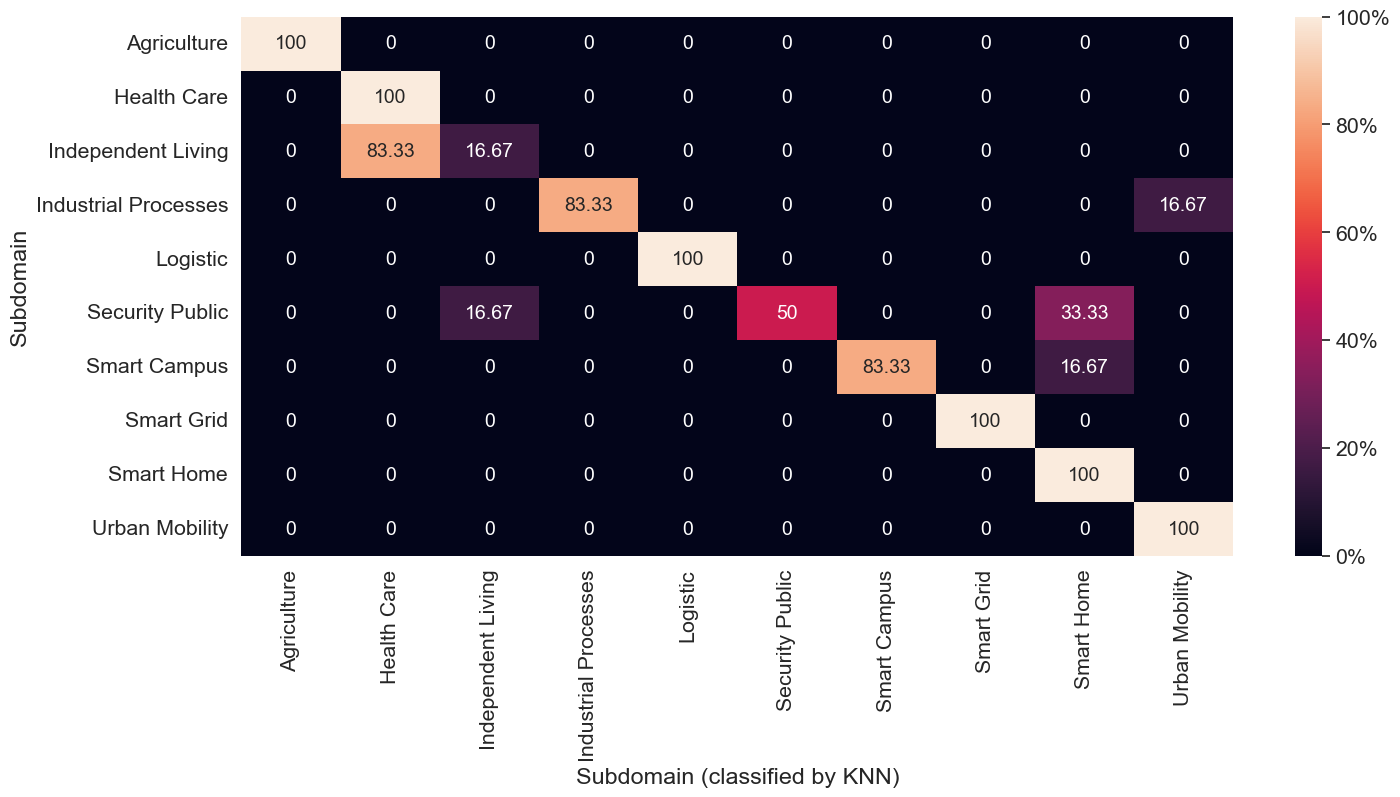

In [20]:
knn_matrix = knn_matrix.rename(columns={"HealthCare": "Health Care", "IndependentLiving":"Independent Living", "IndustrialProcesses": "Industrial Processes",
                                  "SecurityPublic": "Security Public", "SmartCampus": "Smart Campus", "SmartGrid": "Smart Grid",
                                  "SmartHome": "Smart Home", "UrbanMobility": "Urban Mobility"},
                        index={"HealthCare": "Health Care", "IndependentLiving":"Independent Living", "IndustrialProcesses": "Industrial Processes",
                                  "SecurityPublic": "Security Public", "SmartCampus": "Smart Campus", "SmartGrid": "Smart Grid",
                                  "SmartHome": "Smart Home", "UrbanMobility": "Urban Mobility"})

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(knn_matrix, annot=True, fmt='.4g', annot_kws={"size": 14}, cbar_kws={'format': '%.0f%%'}) # font size
ax.set(xlabel="Subdomain (classified by KNN)", ylabel="Subdomain")
plt.show()

In [21]:
print(metrics.classification_report(y_valid, knn_predict))

                     precision    recall  f1-score   support

        Agriculture       1.00      1.00      1.00         6
         HealthCare       0.55      1.00      0.71         6
  IndependentLiving       0.50      0.17      0.25         6
IndustrialProcesses       1.00      0.83      0.91         6
           Logistic       1.00      1.00      1.00         6
     SecurityPublic       1.00      0.50      0.67         6
        SmartCampus       1.00      0.83      0.91         6
          SmartGrid       1.00      1.00      1.00         6
          SmartHome       0.67      1.00      0.80         6
      UrbanMobility       0.86      1.00      0.92         6

           accuracy                           0.83        60
          macro avg       0.86      0.83      0.82        60
       weighted avg       0.86      0.83      0.82        60



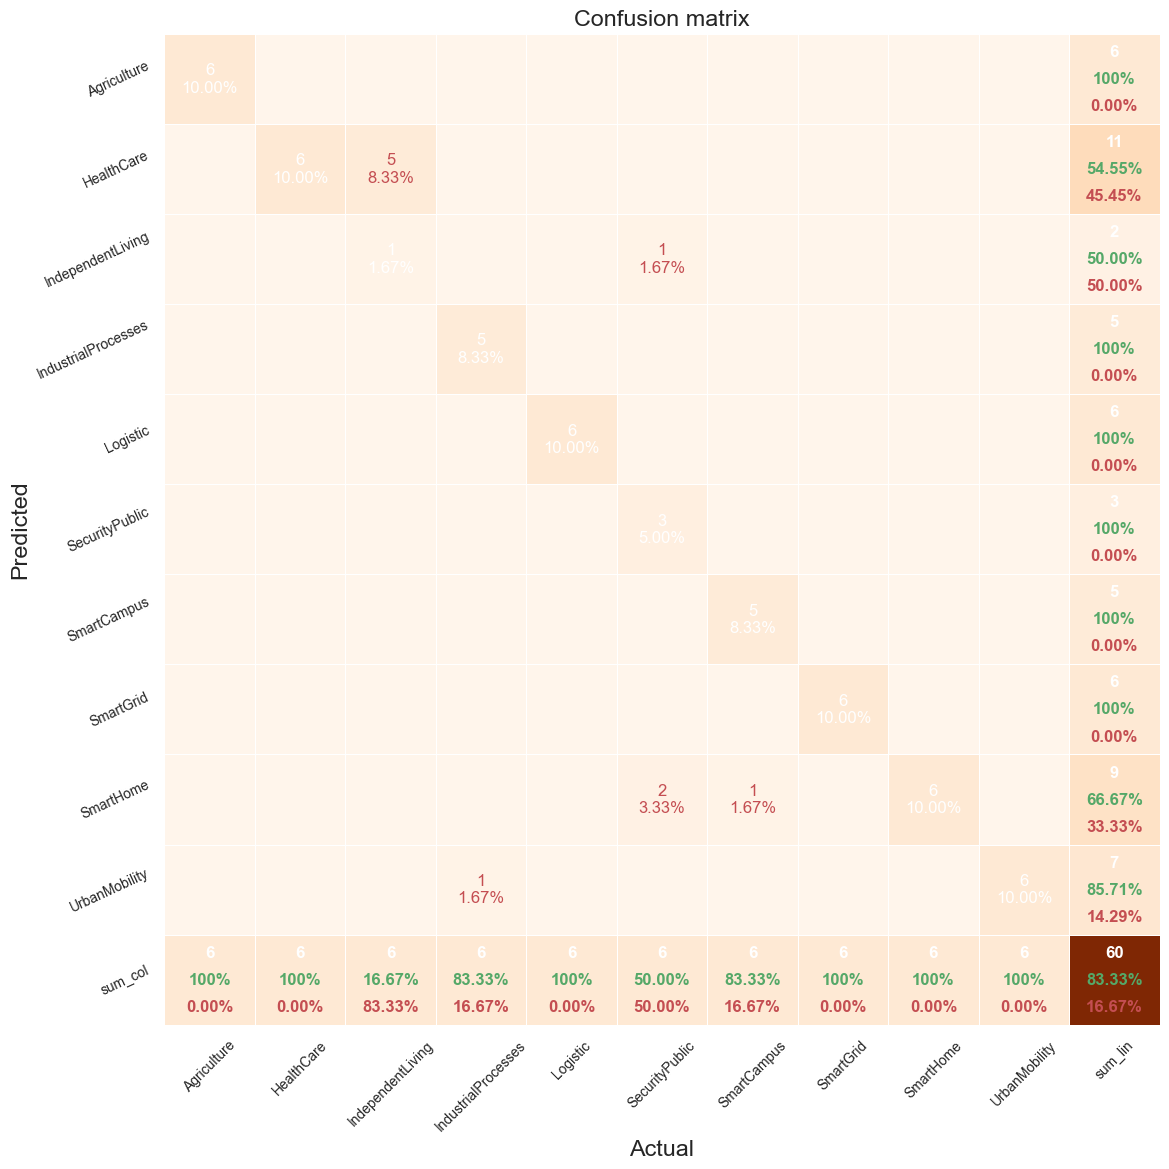

In [22]:
pp_matrix(
    pd.crosstab(
        y_valid, knn_predict, rownames=["Real"], colnames=["Predict"], margins=False),
    fz=12, figsize=[12, 12])

## Classificados via SVM Model

In [23]:
svm_model = joblib.load('svm_model.pkl')

In [24]:
svm_predict = svm_model.predict(X_valid)

In [25]:
svm_matrix = pd.crosstab(y_valid, svm_predict, rownames=["Real"], colnames=["Predict"], margins=False, normalize="index").round(4)*100
svm_matrix

Predict,Agriculture,HealthCare,IndependentLiving,IndustrialProcesses,Logistic,SecurityPublic,SmartCampus,SmartGrid,SmartHome,UrbanMobility
Real,,,,,,,,,,
Agriculture,100.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
HealthCare,0.0,100.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
IndependentLiving,0.0,50.0,50.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00
IndustrialProcesses,0.0,0.0,0.00,83.33,0.0,0.0,0.00,0.0,0.00,16.67
Logistic,0.0,0.0,0.00,0.00,100.0,0.0,0.00,0.0,0.00,0.00
SecurityPublic,0.0,0.0,16.67,0.00,0.0,50.0,0.00,0.0,33.33,0.00
SmartCampus,0.0,0.0,0.00,0.00,0.0,0.0,83.33,0.0,16.67,0.00
SmartGrid,0.0,0.0,0.00,0.00,0.0,0.0,0.00,100.0,0.00,0.00
SmartHome,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,100.00,0.00


In [26]:
print(metrics.classification_report(y_valid, svm_predict))

                     precision    recall  f1-score   support

        Agriculture       1.00      1.00      1.00         6
         HealthCare       0.67      1.00      0.80         6
  IndependentLiving       0.75      0.50      0.60         6
IndustrialProcesses       1.00      0.83      0.91         6
           Logistic       1.00      1.00      1.00         6
     SecurityPublic       1.00      0.50      0.67         6
        SmartCampus       1.00      0.83      0.91         6
          SmartGrid       1.00      1.00      1.00         6
          SmartHome       0.67      1.00      0.80         6
      UrbanMobility       0.86      1.00      0.92         6

           accuracy                           0.87        60
          macro avg       0.89      0.87      0.86        60
       weighted avg       0.89      0.87      0.86        60



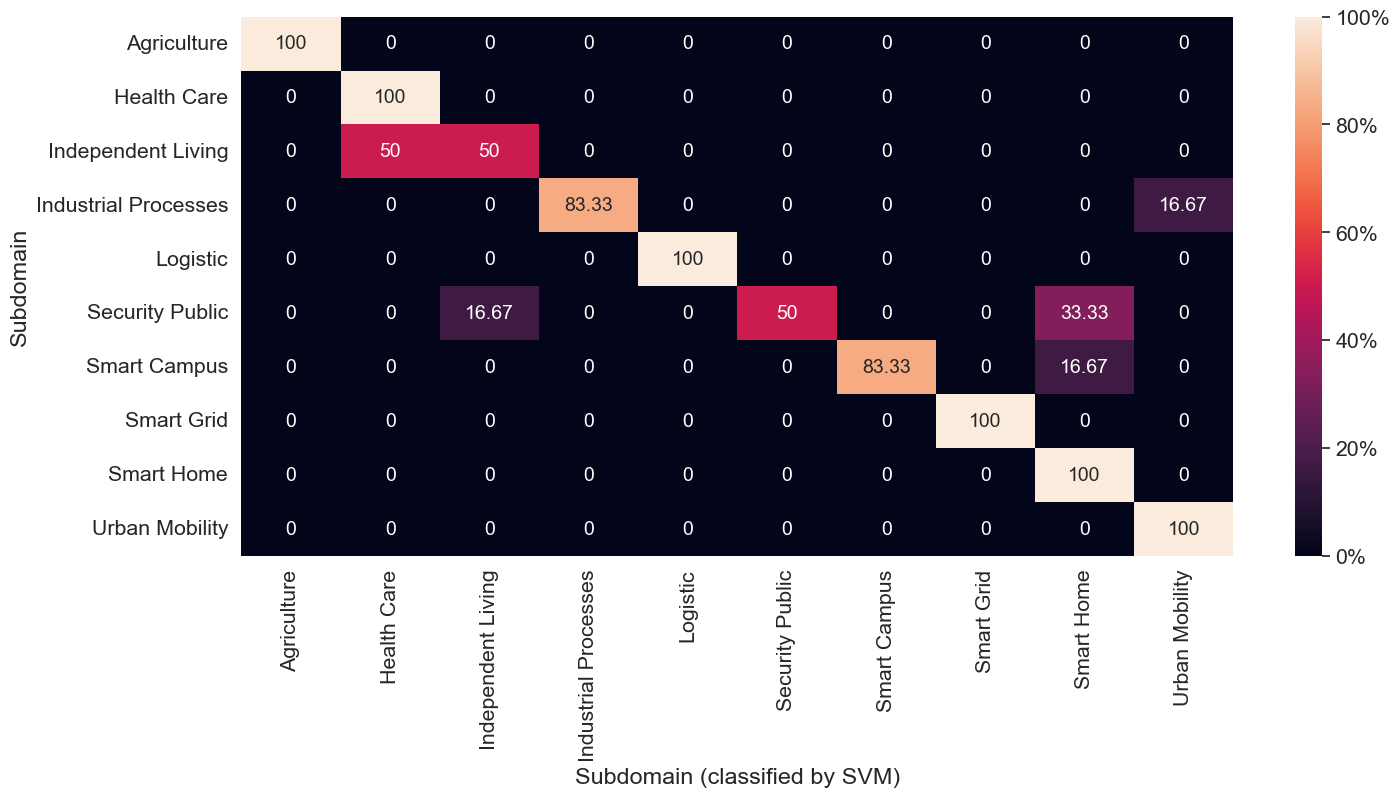

In [27]:
svm_matrix = svm_matrix.rename(columns={"HealthCare": "Health Care", "IndependentLiving":"Independent Living", "IndustrialProcesses": "Industrial Processes",
                                  "SecurityPublic": "Security Public", "SmartCampus": "Smart Campus", "SmartGrid": "Smart Grid",
                                  "SmartHome": "Smart Home", "UrbanMobility": "Urban Mobility"},
                        index={"HealthCare": "Health Care", "IndependentLiving":"Independent Living", "IndustrialProcesses": "Industrial Processes",
                                  "SecurityPublic": "Security Public", "SmartCampus": "Smart Campus", "SmartGrid": "Smart Grid",
                                  "SmartHome": "Smart Home", "UrbanMobility": "Urban Mobility"})

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(svm_matrix, annot=True, fmt='.4g', annot_kws={"size": 14}, cbar_kws={'format': '%.0f%%'}) # font size
ax.set(xlabel="Subdomain (classified by SVM)", ylabel="Subdomain")
plt.show()

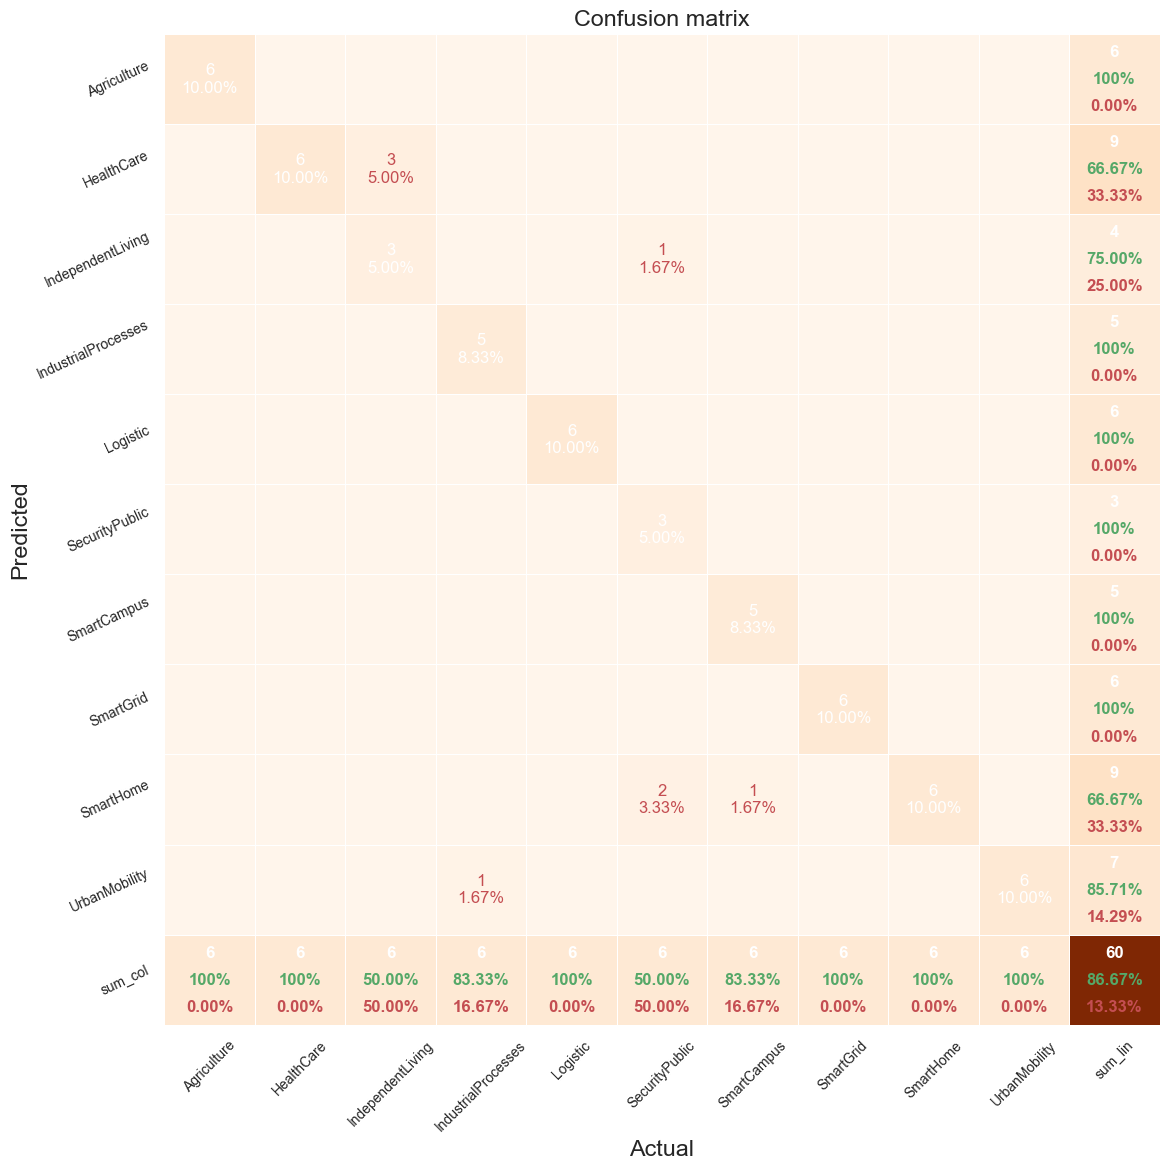

In [28]:
pp_matrix(
    pd.crosstab(
        y_valid, svm_predict, rownames=["Real"], colnames=["Predict"], margins=False),
    fz=12, figsize=[12, 12])

## Classificados via Random Forest Model

In [29]:
rf_model = joblib.load('rf_model.pkl')

In [30]:
rf_predict = rf_model.predict(X_valid)

In [31]:
rf_matrix = pd.crosstab(y_valid, rf_predict, rownames=["Real"], colnames=["Predict"], margins=False, normalize="index").round(4)*100
rf_matrix

Predict,Agriculture,HealthCare,IndependentLiving,IndustrialProcesses,Logistic,SecurityPublic,SmartCampus,SmartGrid,SmartHome,UrbanMobility
Real,,,,,,,,,,
Agriculture,100.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0
HealthCare,0.00,100.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0
IndependentLiving,83.33,0.0,16.67,0.00,0.00,0.0,0.00,0.0,0.00,0.0
IndustrialProcesses,0.00,0.0,0.00,83.33,16.67,0.0,0.00,0.0,0.00,0.0
Logistic,0.00,0.0,0.00,0.00,100.00,0.0,0.00,0.0,0.00,0.0
SecurityPublic,0.00,0.0,16.67,0.00,16.67,50.0,0.00,0.0,16.67,0.0
SmartCampus,0.00,0.0,0.00,0.00,0.00,0.0,83.33,0.0,16.67,0.0
SmartGrid,0.00,0.0,0.00,0.00,0.00,0.0,0.00,100.0,0.00,0.0
SmartHome,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,100.00,0.0


In [32]:
print(metrics.classification_report(y_valid, rf_predict))

                     precision    recall  f1-score   support

        Agriculture       0.55      1.00      0.71         6
         HealthCare       1.00      1.00      1.00         6
  IndependentLiving       0.50      0.17      0.25         6
IndustrialProcesses       1.00      0.83      0.91         6
           Logistic       0.75      1.00      0.86         6
     SecurityPublic       1.00      0.50      0.67         6
        SmartCampus       1.00      0.83      0.91         6
          SmartGrid       1.00      1.00      1.00         6
          SmartHome       0.75      1.00      0.86         6
      UrbanMobility       1.00      1.00      1.00         6

           accuracy                           0.83        60
          macro avg       0.85      0.83      0.82        60
       weighted avg       0.85      0.83      0.82        60



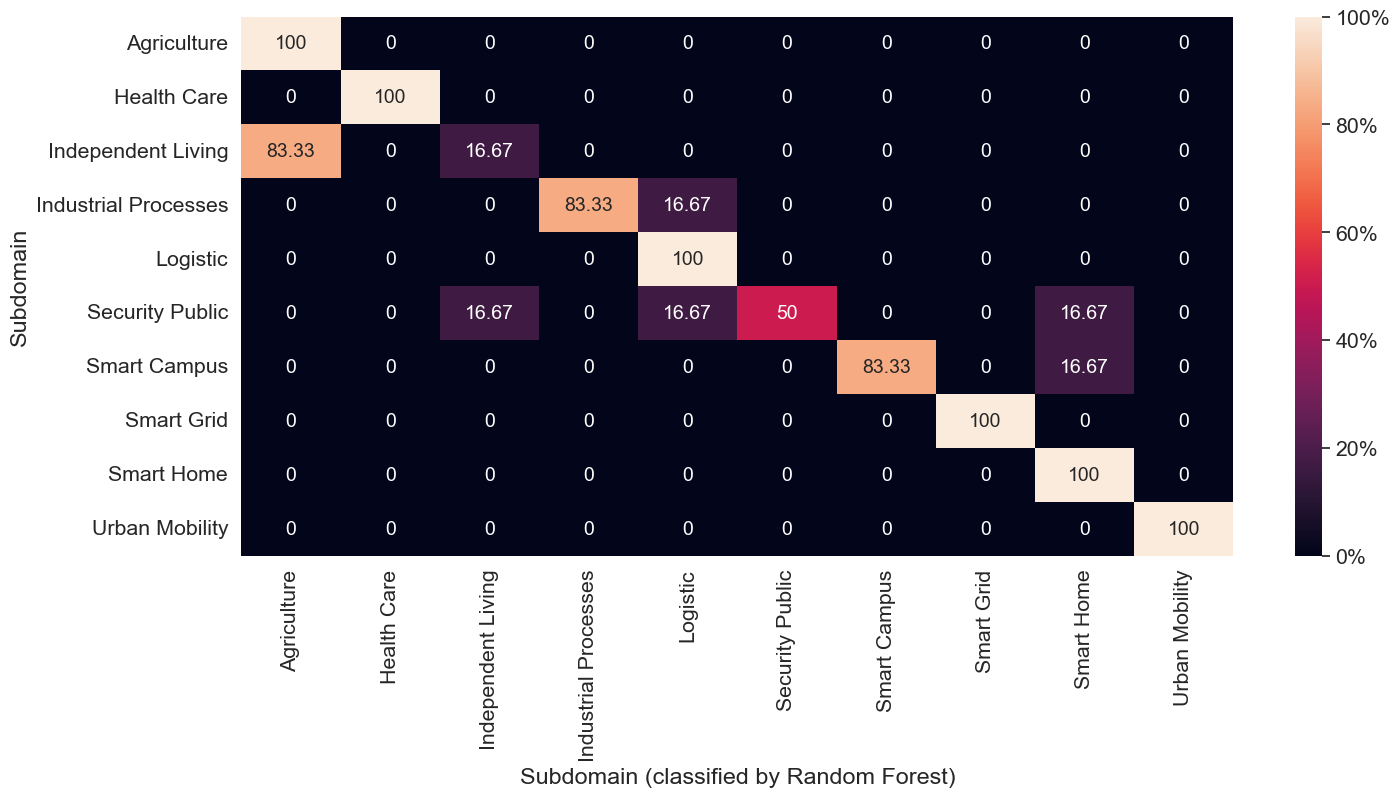

In [33]:
rf_matrix = rf_matrix.rename(columns={"HealthCare": "Health Care", "IndependentLiving":"Independent Living", "IndustrialProcesses": "Industrial Processes",
                                  "SecurityPublic": "Security Public", "SmartCampus": "Smart Campus", "SmartGrid": "Smart Grid",
                                  "SmartHome": "Smart Home", "UrbanMobility": "Urban Mobility"},
                        index={"HealthCare": "Health Care", "IndependentLiving":"Independent Living", "IndustrialProcesses": "Industrial Processes",
                                  "SecurityPublic": "Security Public", "SmartCampus": "Smart Campus", "SmartGrid": "Smart Grid",
                                  "SmartHome": "Smart Home", "UrbanMobility": "Urban Mobility"})

plt.figure(figsize=(16,7))
sns.set(font_scale=1.4) # for label size
ax = sns.heatmap(rf_matrix, annot=True, fmt='.4g', annot_kws={"size": 14}, cbar_kws={'format': '%.0f%%'}) # font size
ax.set(xlabel="Subdomain (classified by Random Forest)", ylabel="Subdomain")
plt.show()

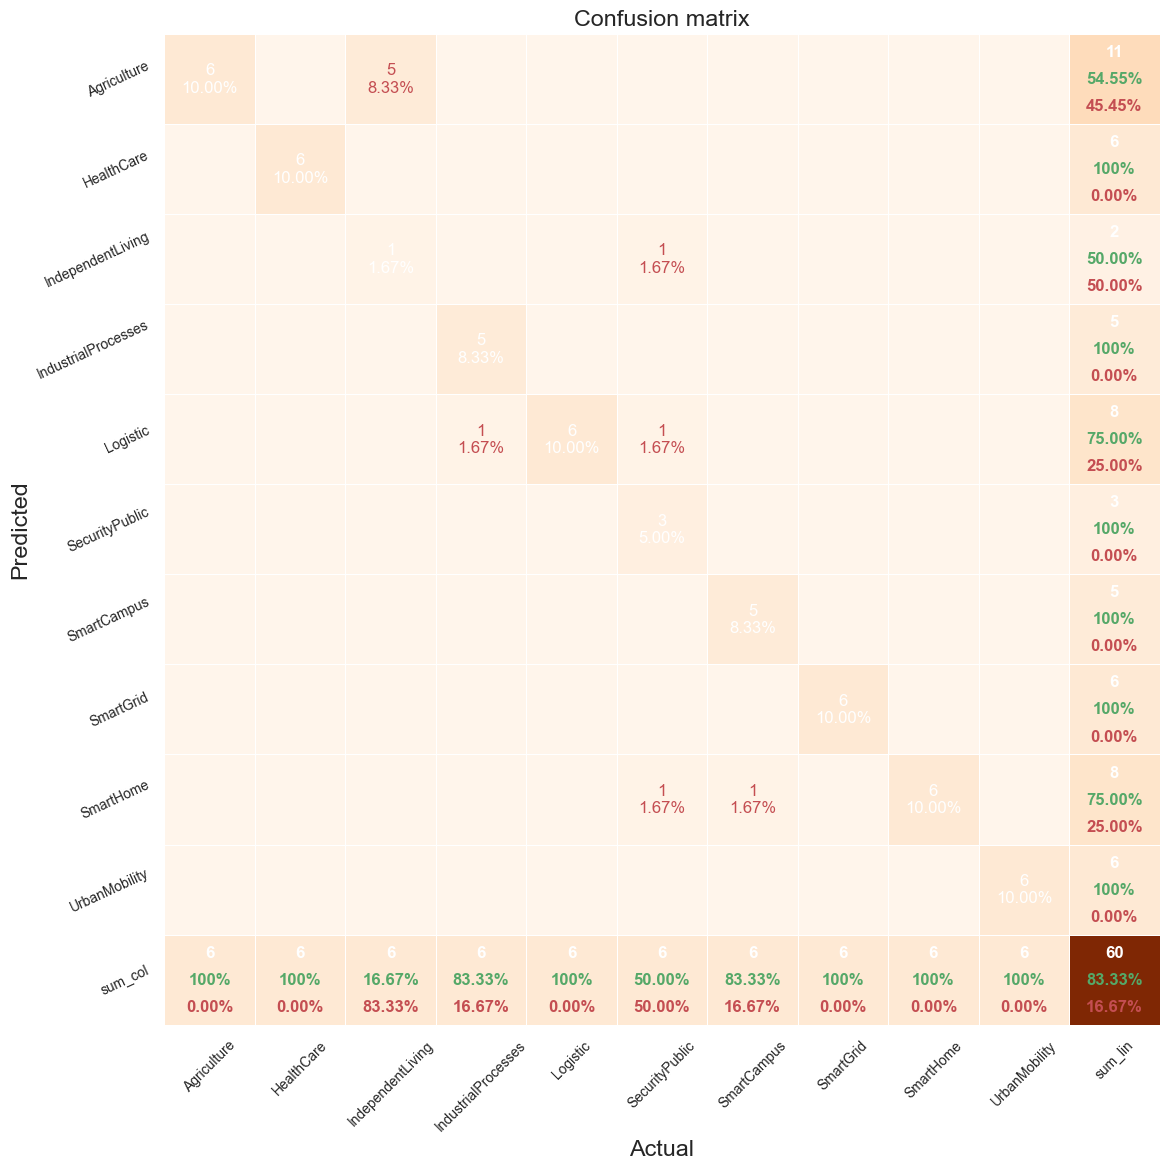

In [34]:
pp_matrix(
    pd.crosstab(
        y_valid, rf_predict, rownames=["Real"], colnames=["Predict"], margins=False),
    fz=12, figsize=[12, 12])